# **CAR PRICE PREDICTION**

###**1.Uploading Data set**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv("/content/Car price data.csv")

In [3]:
df.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,i10MAGNA 1.2,307899,2010,Hyderabad,Petrol,23488,Manual,1,6849
1,1,Hyundai,i10MAGNA 1.1 IRDE2,347599,2013,Hyderabad,Petrol,37003,Manual,3,7732
2,2,Hyundai,Santro XingGLS,305899,2013,Hyderabad,Petrol,22856,Manual,1,6805
3,3,Maruti,AltoLXI,224499,2011,Hyderabad,Petrol,23837,Manual,1,4994
4,4,Maruti,Alto 800LXI OPT,338099,2017,Hyderabad,Petrol,7995,Manual,1,7521


In [4]:
df.shape

(6899, 11)

### **2. Data Cleaning**

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.isnull().sum().sort_values(ascending=False)

Gear             243
Model            243
EMI (monthly)      0
Ownership          0
Driven (Kms)       0
Fuel               0
Location           0
Model Year         0
Price              0
Car Brand          0
dtype: int64

In [6]:
columns = ['Model','Gear']
df = df.dropna(subset = columns).reset_index(drop=False)

In [7]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(6656, 11)

In [11]:
df.isnull().sum()

index            0
Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6656 entries, 0 to 6655
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6656 non-null   int64 
 1   Car Brand      6656 non-null   object
 2   Model          6656 non-null   object
 3   Price          6656 non-null   int64 
 4   Model Year     6656 non-null   int64 
 5   Location       6656 non-null   object
 6   Fuel           6656 non-null   object
 7   Driven (Kms)   6656 non-null   int64 
 8   Gear           6656 non-null   object
 9   Ownership      6656 non-null   int64 
 10  EMI (monthly)  6656 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 624.0+ KB


In [12]:
df.describe(include='all')

,index,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,6656.000000,6656,6656,6.656000e+03,6656.000000,6656,6656,6656.000000,6656,6656.000000,6656.000000
unique,NaN,27,972,NaN,NaN,5,5,NaN,2,NaN,NaN
top,NaN,Maruti,Alto 800LXI,NaN,NaN,Delhi,Petrol,NaN,Manual,NaN,NaN
freq,NaN,3107,197,NaN,NaN,2605,4247,NaN,5819,NaN,NaN
mean,3448.782302,NaN,NaN,5.079749e+05,2014.788612,NaN,NaN,58754.566556,NaN,1.276743,11299.620643
std,1993.638836,NaN,NaN,3.211401e+05,2.833405,NaN,NaN,41501.896689,NaN,0.530970,7143.588594
min,0.000000,NaN,NaN,6.600000e+04,2007.000000,NaN,NaN,199.000000,NaN,1.000000,1468.000000
25%,1723.750000,NaN,NaN,3.120000e+05,2013.000000,NaN,NaN,29422.000000,NaN,1.000000,6940.000000
50%,3453.500000,NaN,NaN,4.281990e+05,2015.000000,NaN,NaN,51245.000000,NaN,1.000000,9525.000000
75%,5178.250000,NaN,NaN,6.009992e+05,2017.000000,NaN,NaN,79737.750000,NaN,1.000000,13369.000000


In [8]:
df = df.drop('index',axis=1)

### **3.EDA**

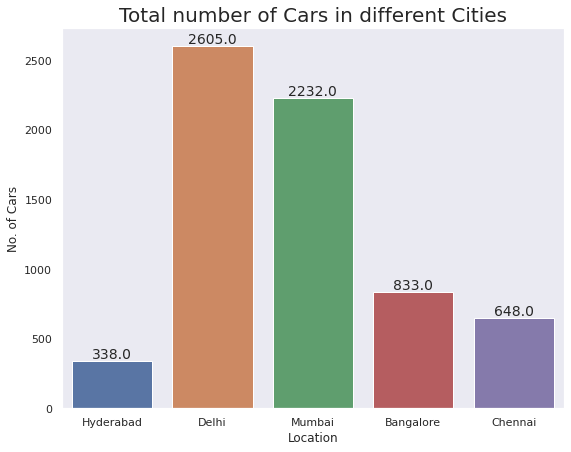

In [16]:
plt.figure(figsize=(9,7))
sns.set(rc={'figure.figsize':(8,6)})
a = sns.countplot(x = 'Location',data=df)
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14)
plt.title("Total number of Cars in different Cities",fontsize=20)
a.set_ylabel("No. of Cars")
plt.grid(False)

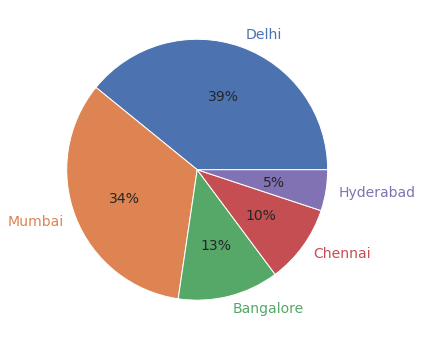

In [19]:
count = df['Location'].value_counts()
count = count.reset_index().rename(columns={'Location':'Count','index':'Location'})
patches,text, pcts= plt.pie(x='Count',labels='Location',autopct='%1.0f%%',data=count,radius=1,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.show()

In [20]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})

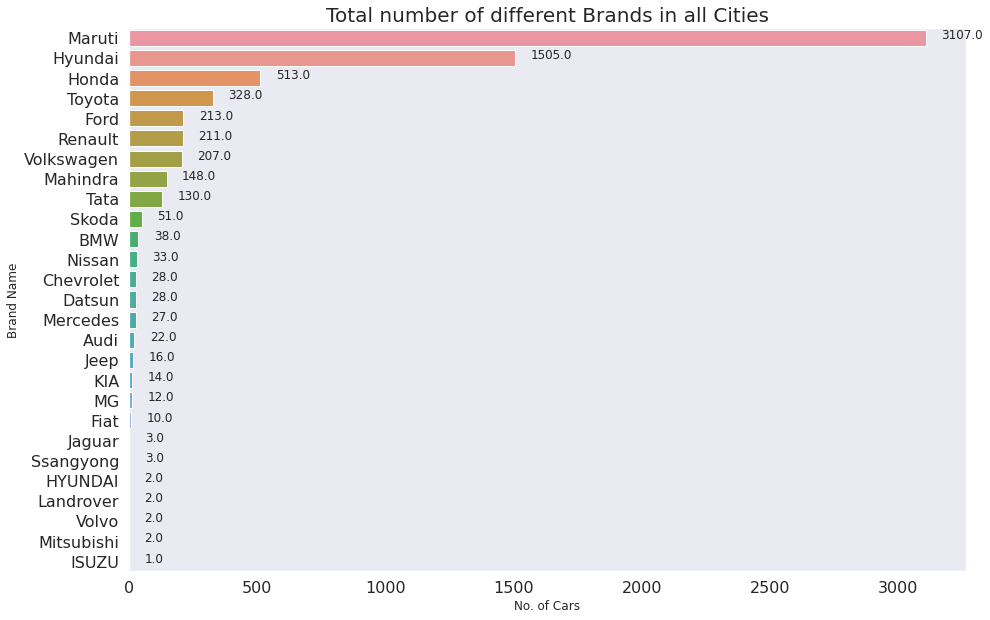

In [23]:
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(60+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width))
a.set_xlabel("No. of Cars")
a.set_ylabel("Brand Name")
plt.title("Total number of different Brands in all Cities",fontsize=20)
plt.grid(False)

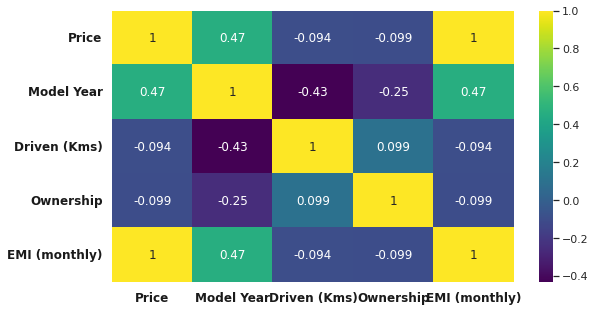

In [59]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

In [24]:
avg_price = df.groupby(by=['Car Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

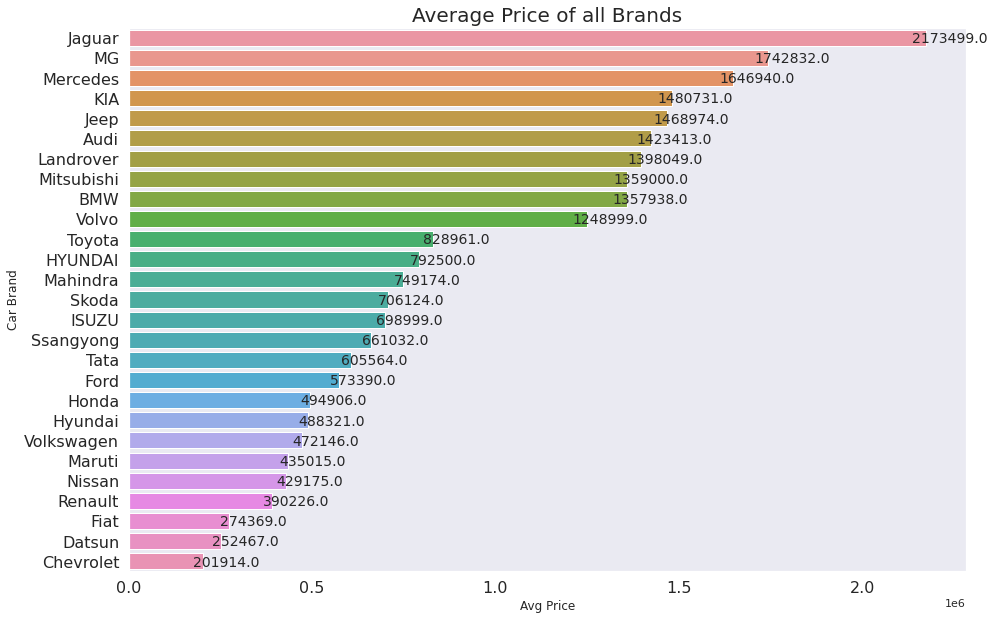

In [60]:
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='Car Brand',x='Avg Price',data=avg_price)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(65000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14)
plt.title("Average Price of all Brands",fontsize=20)
plt.grid(False)

In [10]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

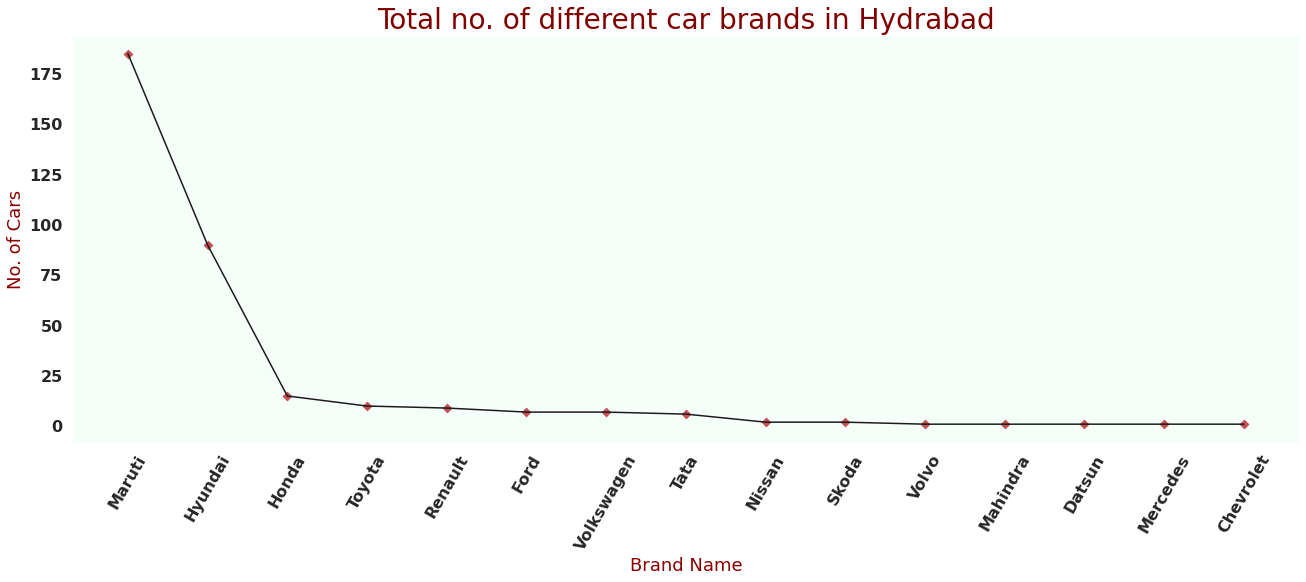

In [12]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=hyd_brands,color='k')
plt.scatter('Brand','Count',data=hyd_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hydrabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

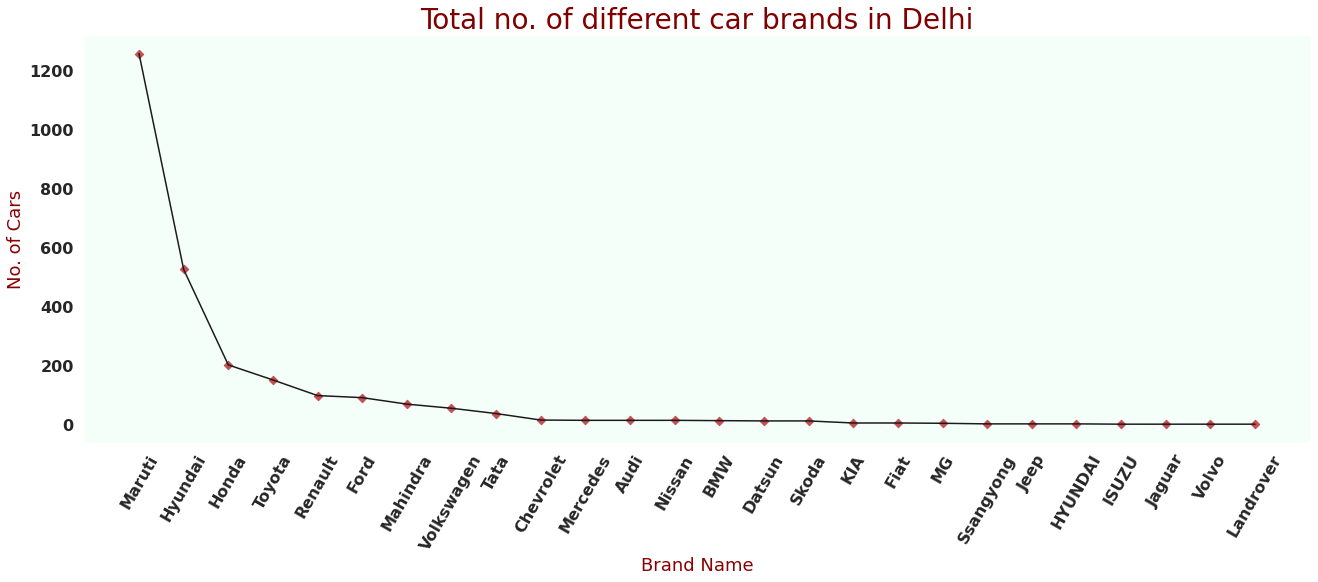

In [63]:
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=delhi_brands,color='k')
plt.scatter('Brand','Count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

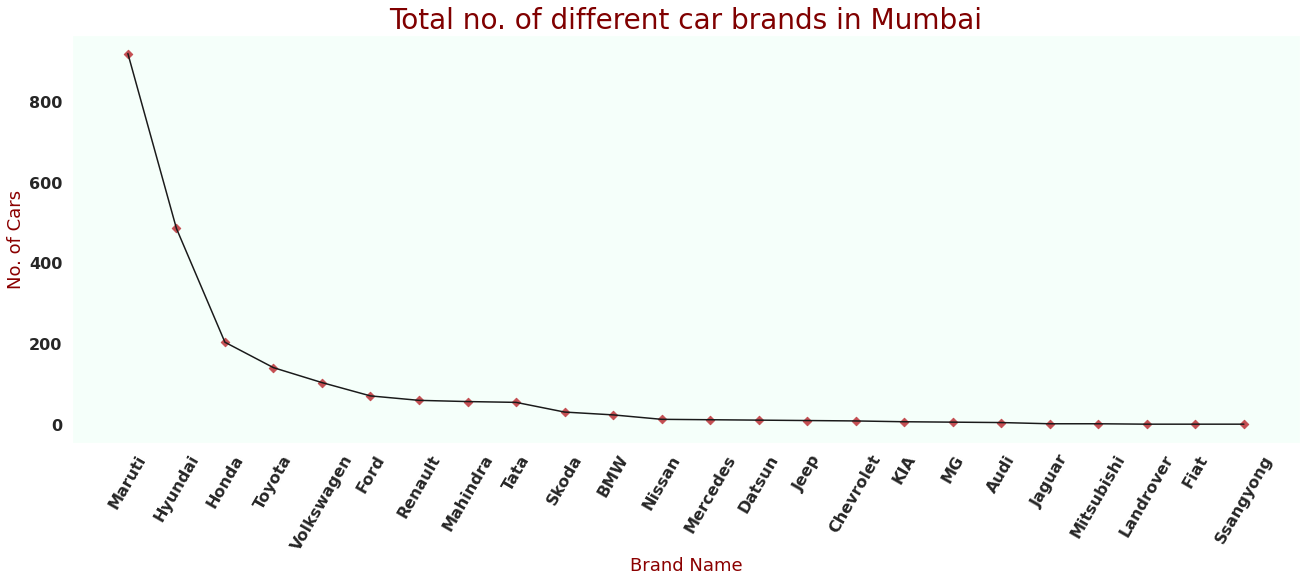

In [64]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=mumbai_brands,color='k')
plt.scatter('Brand','Count',data=mumbai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

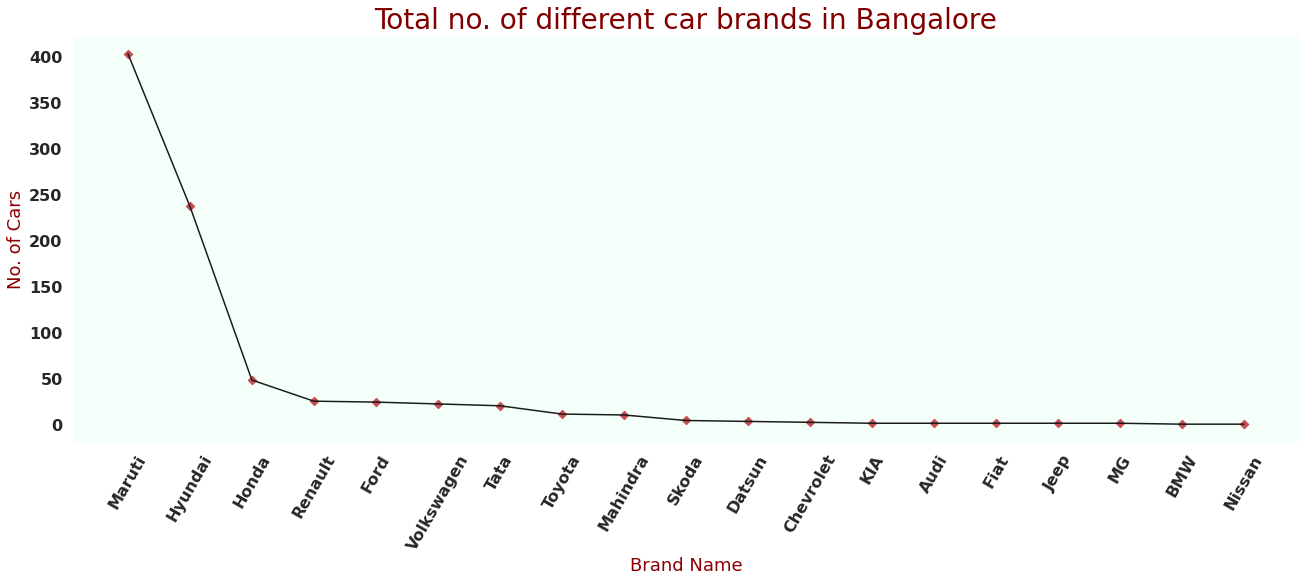

In [65]:
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=bangalore_brands,color='k')
plt.scatter('Brand','Count',data=bangalore_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

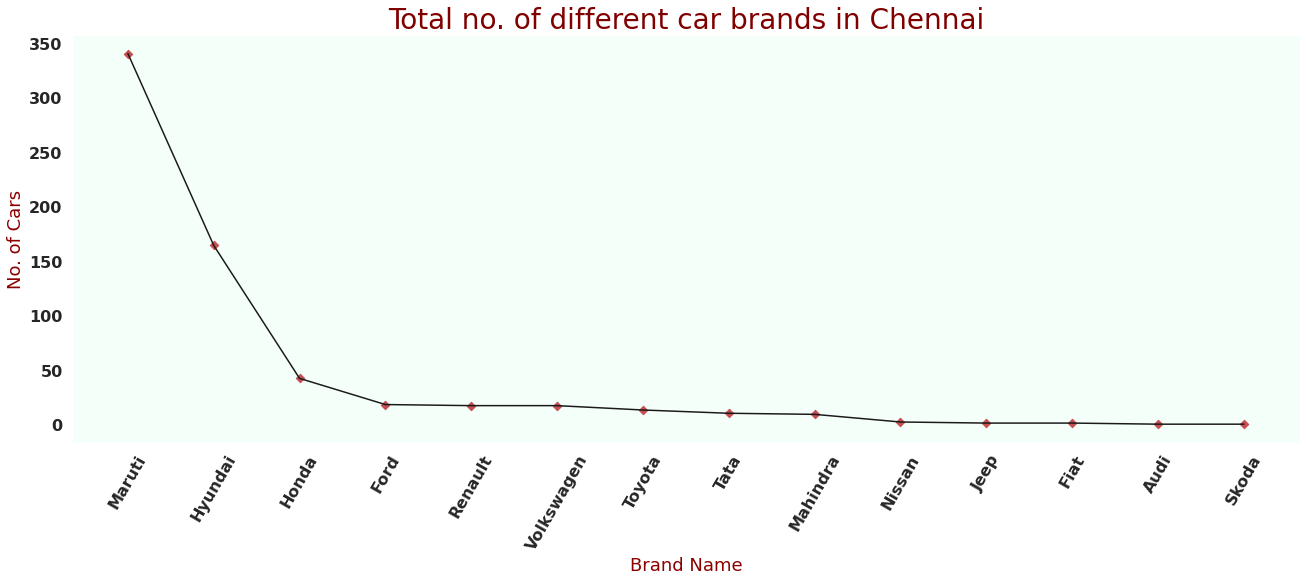

In [67]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=chennai_brands,color='k')
plt.scatter('Brand','Count',data=chennai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

In [68]:
fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)
fuel_location

,Location,Fuel,Count
0,Bangalore,Electric,1
1,Bangalore,Petrol + CNG,1
2,Bangalore,Petrol + LPG,4
3,Bangalore,Diesel,124
4,Bangalore,Petrol,703
5,Chennai,Diesel,118
6,Chennai,Petrol,530
7,Delhi,Petrol + CNG,108
8,Delhi,Diesel,1111
9,Delhi,Petrol,1386


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


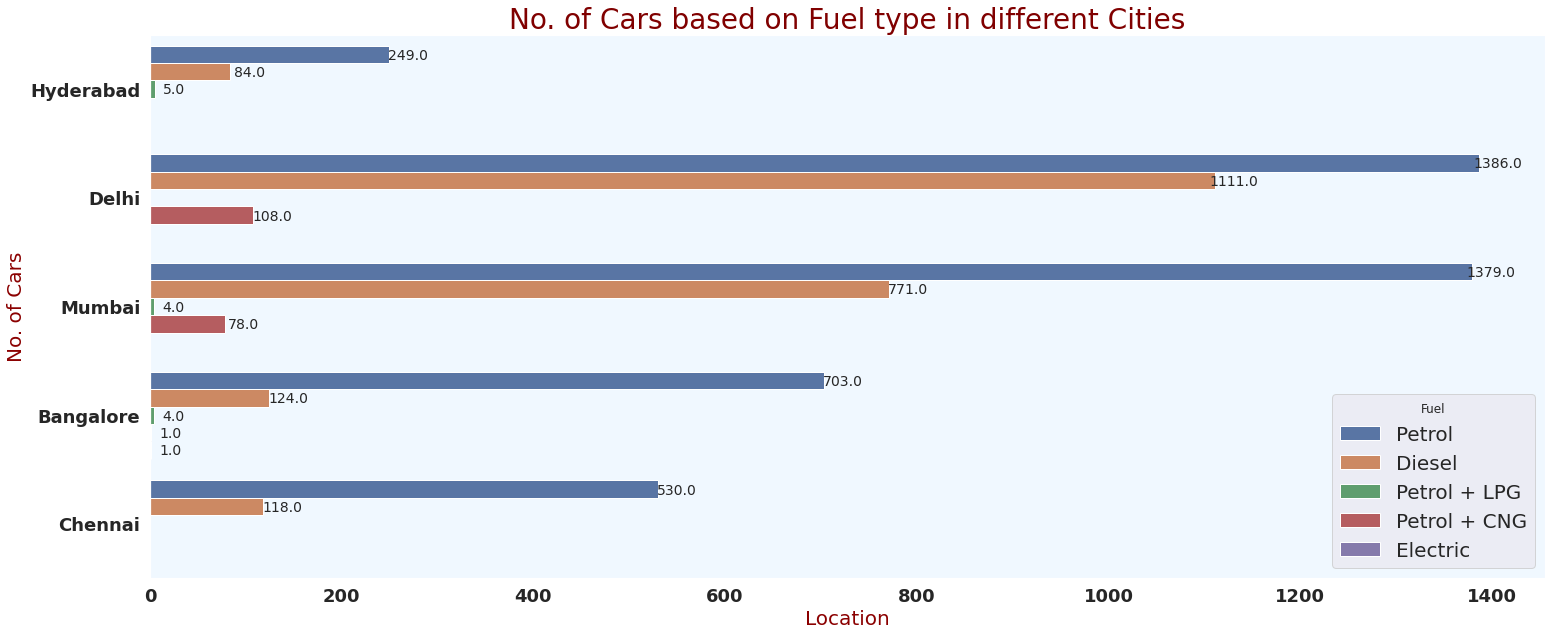

In [69]:
sns.set(rc={'figure.figsize':(25,10)})
a = sns.countplot(y = 'Location',hue='Fuel',data=df)
plt.xticks(rotation=0,fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(20+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Location", fontsize = 20,color='darkred')
a.set_ylabel("No. of Cars", fontsize =20, color='darkred')
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.legend(loc='lower right',title='Fuel',prop={'size': 20})
a.grid(False)

In [13]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,607
1,Bangalore,2,189
2,Bangalore,3,35
3,Bangalore,4,1
4,Bangalore,5,1
5,Chennai,1,482
6,Chennai,2,143
7,Chennai,3,21
8,Chennai,4,2
9,Delhi,1,2047


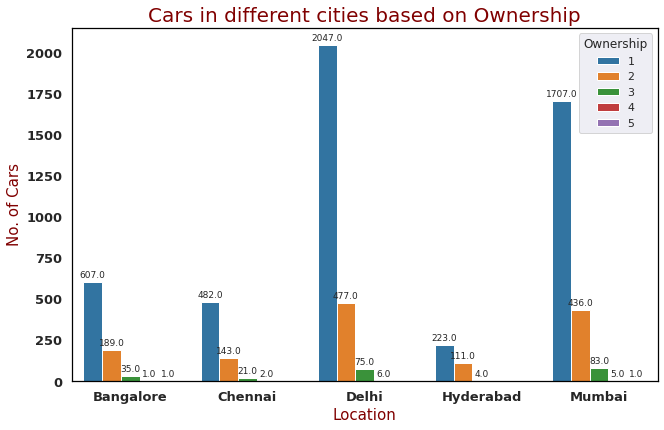

In [14]:

sns.set(rc={'figure.figsize':(10.5,6.5)})
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 15,color='maroon')
a.set_ylabel("No. of Cars", fontsize =15, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

In [17]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,607
1,Bangalore,2,189
2,Bangalore,3,35
3,Bangalore,4,1
4,Bangalore,5,1
5,Chennai,1,482
6,Chennai,2,143
7,Chennai,3,21
8,Chennai,4,2
9,Delhi,1,2047


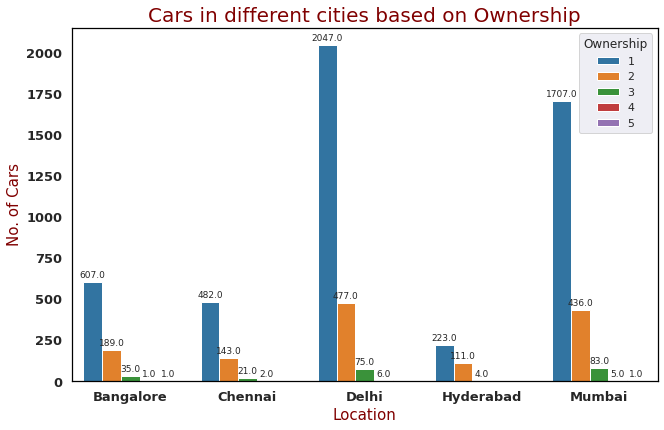

In [18]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 15,color='maroon')
a.set_ylabel("No. of Cars", fontsize =15, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

In [15]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
bangalore = models[models['Location']=='Bangalore']
bangalore

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
0,Bangalore,Diesel,715094,2014,72089,1,15906
1,Bangalore,Electric,236799,2014,67449,1,5267
2,Bangalore,Petrol,449505,2014,43688,1,9999
3,Bangalore,Petrol + CNG,339399,2016,57073,2,7550
4,Bangalore,Petrol + LPG,224199,2008,66101,1,4987


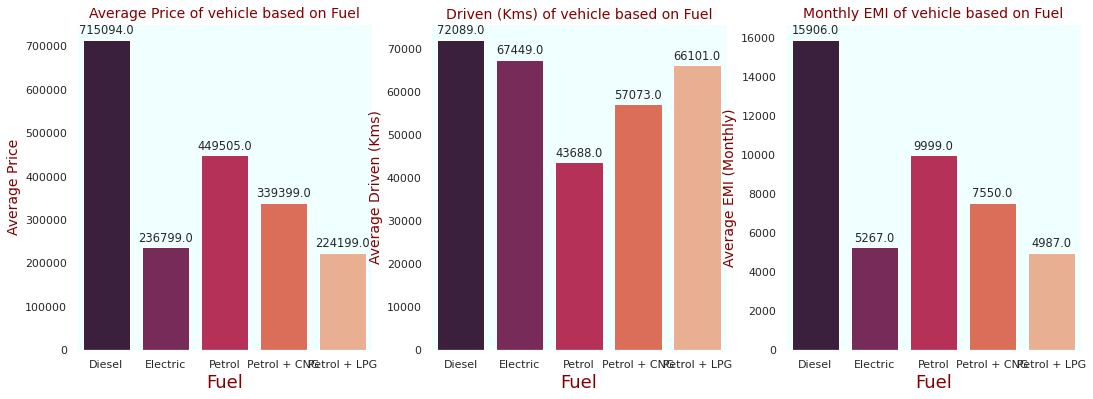

In [16]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=bangalore,palette='rocket',ax =axes[0])
a.set_facecolor('azure')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=bangalore,palette='rocket',ax =axes[1])
b.set_facecolor('azure')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=bangalore,palette='rocket',ax =axes[2])
c.set_facecolor('azure')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
a.grid(False)
b.grid(False)
c.grid(False)

### **4.Data Pre processing**

In [25]:
df.skew()

Price            3.409446
Model Year      -0.275824
Driven (Kms)     2.793594
Ownership        1.915018
EMI (monthly)    3.409446
dtype: float64

In [26]:
x= df.drop(columns='Price')
y= df['Price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,Model Year,Driven (Kms),Ownership,EMI (monthly),Car Brand_Audi,Car Brand_BMW,Car Brand_Chevrolet,Car Brand_Datsun,Car Brand_Fiat,Car Brand_Ford,Car Brand_HYUNDAI,Car Brand_Honda,Car Brand_Hyundai,Car Brand_ISUZU,Car Brand_Jaguar,Car Brand_Jeep,Car Brand_KIA,Car Brand_Landrover,Car Brand_MG,Car Brand_Mahindra,Car Brand_Maruti,Car Brand_Mercedes,Car Brand_Mitsubishi,Car Brand_Nissan,Car Brand_Renault,Car Brand_Skoda,Car Brand_Ssangyong,Car Brand_Tata,Car Brand_Toyota,Car Brand_Volkswagen,Car Brand_Volvo,Model_3 Series320 D PERFORMANCE EDITION,Model_3 Series320D,Model_3 Series320D LUXURYLINE,Model_3 Series320D SPORTLINE,Model_5 Series520D 2.0,Model_5 Series520D LUXURY LINE,Model_5 Series525D,Model_5 Series525D 3.0,Model_5 Series530D HIGHLINE,...,Model_i10ERA 1.1 IRDE,Model_i10MAGNA,Model_i10MAGNA 1.1 IRDE2,Model_i10MAGNA 1.2,Model_i10MAGNA 1.2 AT,Model_i10MAGNA 1.2 KAPPA2,Model_i10MAGNA O WITH SUNROOF,Model_i10SPORTZ 1.1 IRDE2,Model_i10SPORTZ 1.2,Model_i10SPORTZ 1.2 AT,Model_i10SPORTZ 1.2 AT KAPPA2,Model_i10SPORTZ 1.2 KAPPA2,Model_i20 Active1.2 S,Model_i20 Active1.2 SX,Model_i20 Active1.4 SX,Model_i20ASTA 1.2,Model_i20ASTA 1.2 O,Model_i20ASTA 1.4 AT VTVT,Model_i20ASTA 1.4 CRDI,Model_i20ERA 1.4 CRDI,Model_i20MAGNA 1.2 VTVT,Model_i20MAGNA 1.4 CRDI,Model_i20MAGNA O 1.2,Model_i20MAGNA O 1.4 CRDI,Model_i20SPORTZ 1.2 O,Model_i20SPORTZ 1.2 VTVT,Model_i20SPORTZ 1.4 CRDI,Model_i20SPORTZ O 1.4 CRDI,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,2010,23488,1,6849,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,2013,37003,3,7732,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2013,22856,1,6805,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2011,23837,1,4994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2017,7995,1,7521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [27]:
x.shape

(6656, 1015)

In [28]:
y.shape

(6656,)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [30]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [31]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

### **5. Model construction and evaluation**

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Finding best random state**

In [33]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 6.202983682257468e-10
least value 0 6.202983682257468e-10
1 4.939555431349163e-10
least value 1 4.939555431349163e-10
2 6.95756452451235e-10
3 7753.684644464249
4 161.68548219322258
5 7.988979477957514e-10
6 4621.500110503544
7 2.1886781276236889e-10
least value 7 2.1886781276236889e-10
8 1.2413403638333875e-11
least value 8 1.2413403638333875e-11
9 -1.5996204361101718e-11
least value 9 -1.5996204361101718e-11
10 4545.0117897265445
11 9.990847038565676e-10
12 9.201190920293811e-10
13 2.6624147331233416e-11
14 6.857707735008489e-10
15 5.847771156197723e-10
16 76101.07393272062
17 79530.39627200046
18 6.388406470492214e-10
19 -9.916645282714853e-11
least value 19 -9.916645282714853e-11
20 286.8377930824915
21 6.554986553553022e-10
22 5.927286439444401e-10
23 1.7860202206065878e-10
24 6.109511785368227e-10
25 1.9764367920060977e-10
26 108062.34262930752
27 2263.172980354448
28 3.729854203271543e-10
29 6.855283007922708e-10
30 1.6915041996927327
31 1641974.2049948808
32 1102.223346271985

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=19)

**LinearRegression**

In [37]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9999999985076309


In [38]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  11.500023175121438
Mean Squared Error:  185.79377731002822
Root Mean Squared Error:  13.630619109564622
Explained Variance Score:  0.9999999986068554
r2_score: 0.9999999986067973


**RandomForestRegressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9999470910792578


In [40]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  3073.5872972972966
Mean Squared Error:  8347104872.879545
Root Mean Squared Error:  91362.49160831564
Explained Variance Score:  0.9374610053431932
r2_score: 0.9374079746569322


**DecisionTreeRegressor**

In [41]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [42]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  3251.3483483483483
Mean Squared Error:  8242036621.336336
Root Mean Squared Error:  90785.66308253928
Explained Variance Score:  0.9382522452469743
r2_score: 0.9381958447943629


**GradientBoostingRegressor**

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9999140969280633


In [44]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  4950.20052952252
Mean Squared Error:  8003973195.413942
Root Mean Squared Error:  89464.92718050991
Explained Variance Score:  0.9400323462416625
r2_score: 0.9399809993138666


The best models based on evaluation metrics are Linear regresson and DecisionTreeRegressor

**Hyper parametertuning for DecisionTreeRegressor**

In [45]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_features':['auto', 'sqrt', 'log2'],
             'criterion':['mse','friedman_mse','mae', 'poisson'],
             'splitter':['best', 'random']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [47]:
GCV.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}

In [49]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mae',splitter= 'best',max_features='auto')
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [50]:
print("Score of Model is",DTR.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,DTR_final))
print("Root Mean Squared Error", (mean_squared_error(y_test,DTR_final))**0.5 )

Score of Model is 1.0
Mean Absolute Error 3280.604354354354
Root Mean Squared Error 85828.1983071642


**Linear regresson model gives more accuracy and less error rate so choosing Linear Regression model as best model**

In [58]:
import joblib
joblib.dump(LR,"final model.pkl")

['final model.pkl']